In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
#28x28 images are flattentend and stored as an array784
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.train.num_examples

55000

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.validation.images.shape

(5000, 784)

In [8]:
mnist.train.images[100].shape

(784,)

In [9]:
mnist.train.images[200].min()

0.0

In [10]:
mnist.train.images[200].max()

1.0

## Visualize the Data

In [11]:
import matplotlib.pyplot as plt

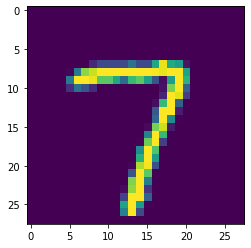

In [12]:
plt.imshow(mnist.train.images[100].reshape(28,28))

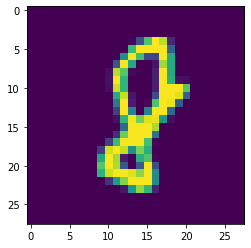

In [13]:
plt.imshow(mnist.train.images[200].reshape(28,28))

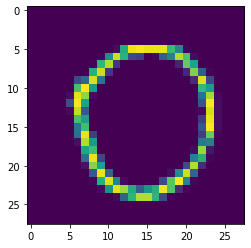

In [14]:
plt.imshow(mnist.train.images[196].reshape(28,28))

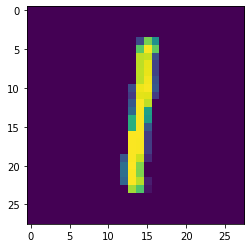

In [15]:
plt.imshow(mnist.train.images[500].reshape(28,28))

In [16]:
batch_x,batch_y=mnist.train.next_batch(500)

In [17]:
batch_x.shape

(500, 784)

In [18]:
batch_y.shape

(500, 10)

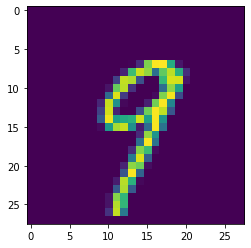

In [19]:
plt.imshow(batch_x[400].reshape(28,28))

In [20]:
batch_y[400]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [21]:
print(batch_y[400].argmax())

9


## Create a model

In [22]:
x=tf.placeholder(tf.float32,[None,784]) #2 features
y_true=tf.placeholder(tf.float32,[None,10]) #labels

In [23]:
#10 sets of 784 weights
#w=tf.Variable(tf.zeros([784,10]))

In [24]:
#10 biases - one for each neuron
#b=tf.Variable(tf.zeros([10]))

In [25]:
#Net input value and activation function
#I=tf.add(tf.matmul(x,w),b)
#softmaxoutput=tf.nn.softmax(I)

In [26]:
weight=tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
bias=tf.Variable(tf.truncated_normal([200],stddev=0.1))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)

netinput=tf.add(tf.matmul(x,weight),bias)

#activation function
output1=tf.nn.relu(netinput)

In [27]:
#weight and bias
weight2=tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
bias2=tf.Variable(tf.truncated_normal([100],stddev=0.1))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)

netinput2=tf.add(tf.matmul(output1,weight2),bias2)

#activation function
output2=tf.nn.relu(netinput2)

In [28]:
#weight and bias
weight3=tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
bias3=tf.Variable(tf.truncated_normal([60],stddev=0.1))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)

netinput3=tf.add(tf.matmul(output2,weight3),bias3)

#activation function
output3=tf.nn.relu(netinput3)

In [29]:
#weight and bias
weight4=tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
bias4=tf.Variable(tf.truncated_normal([30],stddev=0.1))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)

netinput3=tf.add(tf.matmul(output3,weight4),bias4)

#activation function
output4=tf.nn.relu(netinput3)

In [30]:
#weight and bias
weight5=tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
bias5=tf.Variable(tf.truncated_normal([10],stddev=0.1))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)

netinput4=tf.add(tf.matmul(output4,weight5),bias5)

#activation function
output5=tf.nn.softmax(netinput4)

Loss and optmizer

In [31]:
#define loss function

In [62]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=output5)
loss=tf.reduce_mean(individual_loss)
#Minimize the loss using gradient descent optimizer
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=gdo.minimize(loss)

### Create Session

In [63]:
init=tf.global_variables_initializer()

In [64]:
sess=tf.Session()
sess.run(init)

In [65]:
#training
for step in range(10000):
    batch_x,batch_y=mnist.train.next_batch(200)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [66]:
#infrence- predict
#execute the output node i a session
predict=sess.run(output5,feed_dict={x:mnist.test.images})

In [67]:
predict

array([[5.8102814e-21, 6.0632995e-22, 9.7908886e-15, ..., 1.0000000e+00,
        1.0731910e-23, 7.5734411e-21],
       [3.4431736e-29, 2.5137958e-17, 1.0000000e+00, ..., 2.8819244e-19,
        5.1734929e-13, 0.0000000e+00],
       [2.7822828e-26, 1.0000000e+00, 1.1698926e-11, ..., 8.0147746e-09,
        1.0103669e-10, 3.3008293e-19],
       ...,
       [3.9500919e-27, 3.8284788e-24, 5.7005739e-29, ..., 8.2589682e-26,
        2.3837201e-18, 6.0294595e-23],
       [5.2331886e-32, 2.5367581e-27, 0.0000000e+00, ..., 5.5085487e-33,
        3.5071429e-17, 7.0846516e-32],
       [2.3662786e-19, 9.8796970e-22, 2.0020448e-13, ..., 7.9107548e-28,
        1.4019125e-11, 2.3124218e-37]], dtype=float32)

In [68]:
#argmax will give the predicted value in terms of a number
result=sess.run(tf.argmax(predict,axis=1))

In [69]:
result

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [70]:
result.shape

(10000,)

In [71]:
#same way get the label value using argmax
labhot=sess.run(tf.argmax(mnist.test.labels,axis=1))

In [72]:
labhot

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [73]:
accuracy_score(labhot,result)

0.9765

In [86]:
#Infrence
test_image,test_label=mnist.validation.next_batch(1)

In [87]:
#run infrence
mymax=tf.argmax(output5,1)
print("Preicted Value:")
print(sess.run(mymax,feed_dict={x:test_image}))

Preicted Value:
[0]


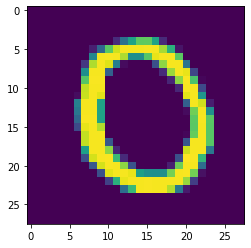

In [88]:
#display the image
plt.imshow(test_image.reshape(28,28))